# Outline

## Accuracy, Precision, Recall, AUC

Accuracy: Percentage of Correct Predictions out of Total Predictions<br>
Precision: Percentage of True Positives out of Actual Results<br>
Recall: Ratio of True Positives over Predicted Results<br>
AUC: Area Under ROC Curve, ideally 1.0<br>

## Confusion Matrix
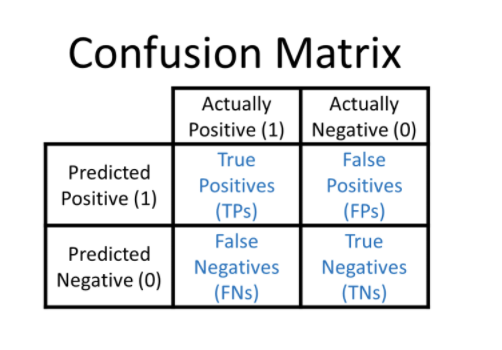

## ROC Curve

ROC is a probability curve that indicates how good the model is for distinguishing the classes, in terms of the predicted probability. <br>

Ideally it looks like the graph below:

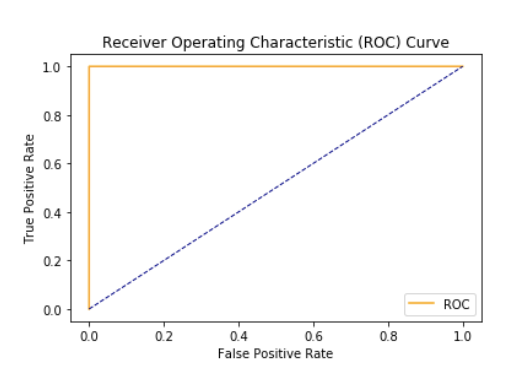

## Feature Importance
Feature Importance shows the numerical weight for each input for a model

## Reprediction of 2012 Data
The most accurate model was used to re-predict 2012 food shortage map and was compared to the actual food shortage classifications.<br>

# Models

## Read In Data 

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df_data = pd.read_csv('data.csv',index_col=0)
df_data.drop(['area_harvested','precipitation','irrigation', 'Daily_Caloric_Intake', 'Food_Availability_PC'], axis=1, inplace=True)
df_data.replace('NaN', np.nan)
df_data = df_data.dropna()


In [6]:
df_data.Food_Insecure.value_counts()

1    420
0     99
Name: Food_Insecure, dtype: int64

In [7]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Logistic Regression

https://towardsdatascience.com/python-scikit-learn-logistic-regression-classification-eb9c8de8938d

Accuracy: 0.8307692307692308
Precision: 0.8307692307692308
Recall: 1.0


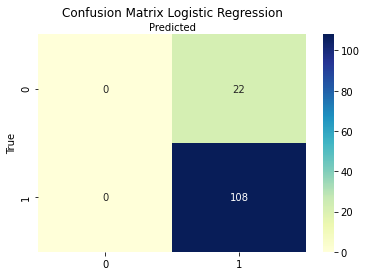

In [8]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df_data.Food_Insecure.copy()
X = df_data.drop(['country','year','Food_Insecure'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix Logistic Regression', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


AUC: 0.73


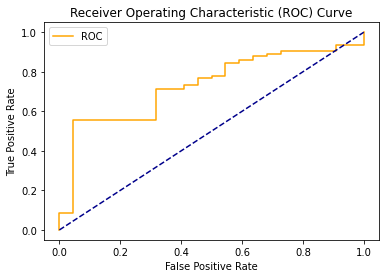

In [9]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Logistic Regression Variable Importance
https://machinelearningmastery.com/calculate-feature-importance-with-python/

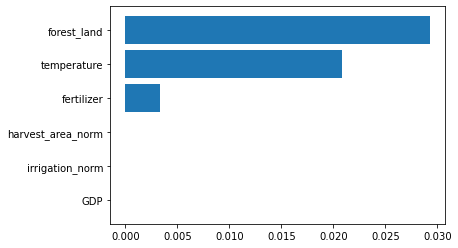

In [10]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X_train.columns.values)
f_importances(model.coef_[0], features_names)

## Random Forest

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

Accuracy: 0.9476744186046512
Precision: 0.9375
Recall: 1.0


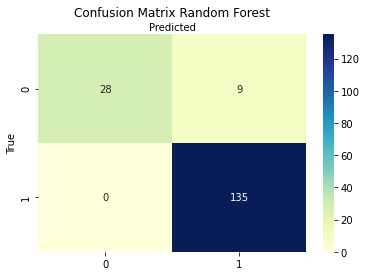

In [11]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

y = df_data.Food_Insecure.copy()
X = df_data.drop(['country','year','Food_Insecure'], axis=1)

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix Random Forest', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

AUC: 0.95


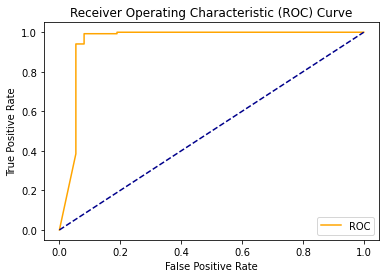

In [12]:
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Random Forest Feature Importance

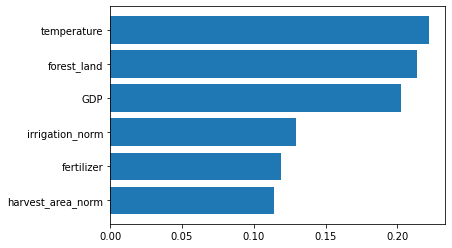

In [13]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X_train.columns.values)
f_importances(rfc.feature_importances_, features_names)

##  Support Vector Machine

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Accuracy: 0.7692307692307693
Precision: 0.8285714285714286
Recall: 0.90625


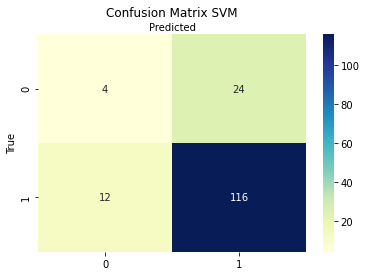

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = df_data.Food_Insecure.copy()
X = df_data.drop(['country','year','Food_Insecure'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix SVM', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

AUC: 0.57


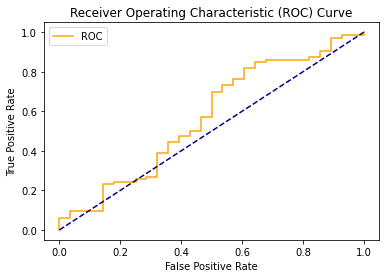

In [15]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Support Vector Machine Feature Importance
https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

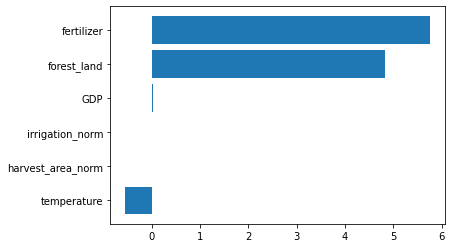

In [16]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X_train.columns.values)
f_importances(clf.coef_[0], features_names)

## Linear Discriminant Analysis

https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/

Accuracy: 0.8557692307692307
Precision: 0.8762886597938144
Recall: 0.9659090909090909


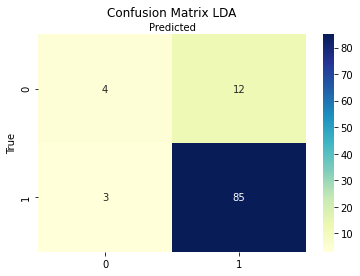

In [17]:
import numpy as np
import pandas as pd

y = df_data.Food_Insecure.copy()
X = df_data.drop(['country','year','Food_Insecure'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix LDA', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

AUC: 0.81


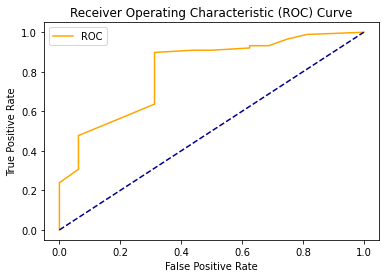

In [18]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Linear Discriminant Analysis Feature Importance

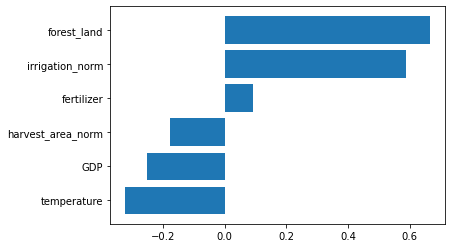

In [19]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X.columns.values)
f_importances(lda.coef_[0], features_names)

## KNN

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Accuracy: 0.9519230769230769
Precision: 0.9397590361445783
Recall: 1.0


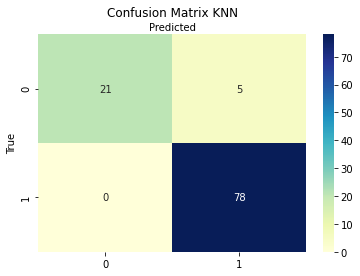

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = df_data.Food_Insecure.copy()
X = df_data.drop(['country','year','Food_Insecure'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix KNN', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

AUC: 0.81


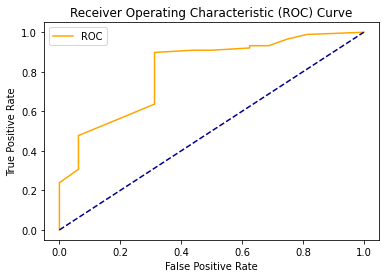

In [20]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Map of 2012 repredicted with RFC

/Users/isitatalukdar/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1714: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/Users/isitatalukdar/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1715: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % uvk, UserWarning)


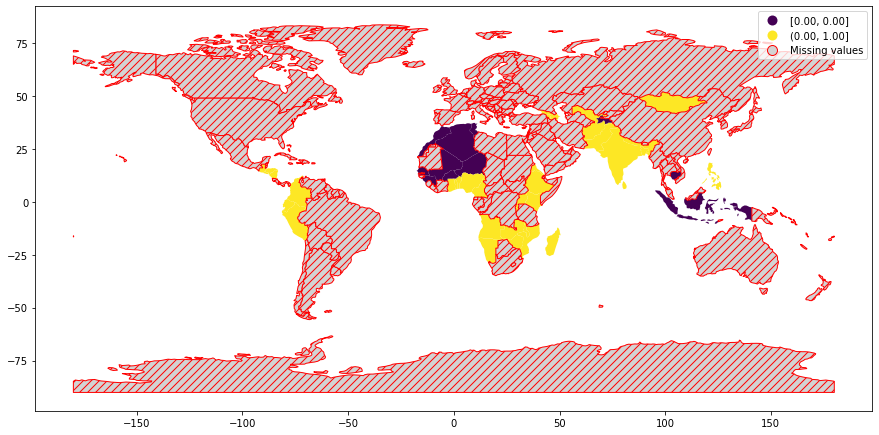

In [21]:
y_all = rfc.predict(X)
df_data["all_repredicted"] = y_all

import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

year = 2012
name1 = "all_repredicted" + str(year)
row_count = 0
for country in list(world["name"]):
    temp = df_data.loc[(df_data['country'] == country) & (df_data['year'] == year), 'all_repredicted']
    if not temp.empty:
            world.loc[row_count, name1] = temp.iloc[0]
    row_count = row_count + 1
    


world.plot(
    column=name1,
    legend=True,
    scheme="natural_breaks",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

# Conclusion

The Random Forest Algorithm and the K-Nearest Neighbor algorithms performed best at around 95% (well over the success threshold of 80%)<br>

The most significant features in predicing food shortage are Forest Land, Temperature, and Fertilizer<br> 

<b>Based on this project, Machine Learning Algorithms are confirmed to be able to accurately predict Food Shortage based on environmental and socioeconomic factors</b> 
